In [10]:
import pandas as pd
import numpy as np
from tqdm import tqdm
from sklearn.cluster import AgglomerativeClustering

In [11]:
data_set = 'Irish_2010'
attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')

In [ ]:
def dist(a, b, alpha, beta):
    tmp = np.power((a - alpha), 2) + np.power((b - beta), 2)
    tmp = tmp.sum(axis=1)
    return tmp

def dist(a, b, alpha, beta):
    tmp = abs(a - alpha) + abs(b - beta)
    tmp = tmp.sum(axis=1)
    return tmp

In [ ]:
# Hierarchical clustering (euclidean&cityblock)

dist = 'cityblock'
for num_clusters in range(1, 17, 2):
    labels = []
    for month in tqdm(range(12)):

        X = []
        for i in range(len(attr)):
            id = attr['ID'][i]
            df = pd.read_csv('../data/' + data_set + '_profiles/' + str(id) + '.csv', header = None).values
            X.append(df[month])
        X = np.array(X)
        X = (X - np.min(X))/(np.max(X) - np.min(X))

        hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity=dist, memory=None, connectivity=None, 
                                               compute_full_tree='auto', linkage='average', pooling_func='deprecated', distance_threshold=None).fit(X)
        labels.append(hierarchical.labels_)

    pd.DataFrame(np.array(labels).T).to_csv('../result/' + data_set + '/cluster/point/hierarchical/' + dist + '/n_clusters_' + str(num_clusters) + '.csv', header=None, index=False)

In [47]:
# Hierarchical clustering (DTW)

dist = 'DTW'
for num_clusters in range(1, 17, 2):
    labels = []
    for month in tqdm(range(12)):

        mat = pd.read_csv('../result/' + data_set + '/cluster/point/hierarchical/' + dist + '/mat_month_' + str(month+1) + '.csv', header=None).values
        hierarchical = AgglomerativeClustering(n_clusters=num_clusters, affinity='precomputed', memory=None, connectivity=None, 
                                               compute_full_tree='auto', linkage='complete', pooling_func='deprecated', distance_threshold=None).fit(mat)
        labels.append(hierarchical.labels_)

    pd.DataFrame(np.array(labels).T).to_csv('../result/' + data_set + '/cluster/point/hierarchical/' + dist + '/n_clusters_' + str(num_clusters) + '.csv', header=None, index=False)

100%|██████████| 1/1 [00:00<00:00,  1.83it/s]


## Plot

In [48]:
# Plot preparation
import matplotlib.pyplot as plt
%matplotlib inline

data_set = 'Irish_2010'
method = 'hierarchical/DTW'
# method = 'kmeans'

num_clusters = 3
month = 1

attr = pd.read_csv('../data/' + data_set + '_attr_final.csv')
labels = pd.read_csv('../result/' + data_set + '/cluster/point/' + method + '/n_clusters_' + str(num_clusters) + '.csv', header=None)

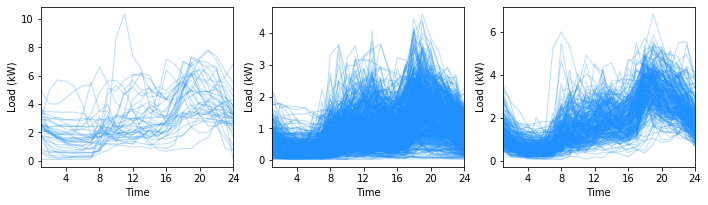

In [49]:
# Plot
plt.figure(figsize=(20,10))
for k in range(num_clusters):
    plt.subplot(3, 5, k+1)
    for i in range(len(attr)):
        id = attr['ID'][i]
        df = pd.read_csv('../data/' + data_set + '_profiles/' + str(id) + '.csv', header=None).values
        if labels[month-1][i] == k:
            plt.plot(list(range(1, 25)), df[month-1], alpha=0.3, color='dodgerblue', linewidth=1)

    # Plot Parameters
    plt.xlabel('Time')
    plt.ylabel('Load (kW)')
    new_ticks = np.floor(np.linspace(0, 24, 7))
    plt.xticks(new_ticks)
    plt.xlim(1, 24)